# Some Python

To remind you of useful syntax in Python, I recommend [the introductory course to programming with Python by G. Faccianoni].(http://faccanoni.univ-tln.fr/user/enseignements/20192020/PIM11_L1_NEW.pdf)





1. write a comment in python : You will write your first and last name at the beginning of the file.
2. display a text: ‘Welcome to the numerical optimisation course’.
3. define a variable: x which is 36.3
4. Define a list: {3,5,7,8, 2, 1}.
5. access and display its 3rd element
6. define a matrix and display its inverse
7. use the plot functions to display the curve (x-2)^2 on the interval [0,4].
8. define a function that returns (x-2)^2
9. use this function to calculate the value of (6.3-2)^2






In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt

from matplotlib.pylab import *


#1. comment in python :
# Vous ecrirez votre nom et prénom en debut de fichier
# Auteur : Claire DUNE
# Date : 9 avril 2020
# Brief : quelqes syntaxes de base en python


#2. display a text : "Bienvenue dans le cours d'optimisation numérique"
print("Bienvenue dans le cours d'optimisation numérique")


#3. define a value : x equal to 36.3
# Be carreful python is case sensitive !
# Donc mavariable, Mavariable et MAVARIABLE are different variables
#.
#do not pick python key :
#and as assert break class continue def del elif else except False finally for from
#global if import in is lambda not or pass print raise range return True try while with y

x = 36.3
print(x)

#4. define a list : {3,5,7,8, 2, 1}
maliste = [3,5,7,8, 2, 1]
print(maliste)


#5. access the 3rd element and display it
trois = maliste[2] # attention, le premier element a pour indice 0
print(trois)

#6. define a matrix and display its inverse
A = [[1, 1, 1], [3, 4, 3], [3, 3, 4]]
print(A)


Ai = inv(A)
print (Ai)

# check
print (Ai.dot(A))

#7. display (x-2)^2 on [0,4]
# define a function (x-2)^2
def courbe(x):
  return (x-2)**2

x=linspace(-1,10,100)
plot(x,courbe(x))

# utiliser cette fonction pour calculer la valeur de (6.3-2)^2
y = courbe(6.3)
print(y)

# Unidimensional functions


#Ex1
Plot these functions and there derivative using python :

a) $f(x)=x^2-2$

b) $g(x)=\frac{1}{3}(x-1)^3$

d) $h(x)=\frac{1}{2}(x-\sqrt{2})$

e) $i(x)=\frac{1}{8}(e^{4(x-\sqrt{2})}-1)$

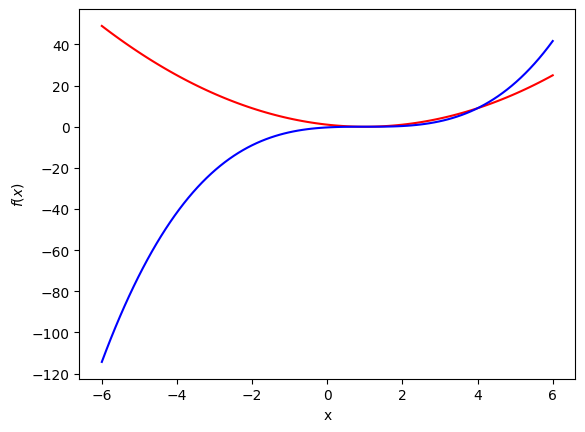

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import *

x = linspace(-6,6,100)
xp = linspace(0.1,6,100)

def f(x):
    return (x-1)**2

def g(x):
    return (x-1)**3/3



plt.plot(x,f(x),'r')
plt.plot(x,g(x),'b')
ylabel('$f(x)$')
xlabel("x")
show()

##Ex2

Create a function that numerically approximate the derivative. Use it on the functions of Ex1 and plot the results with regards to the true derivative on the same graph.


In [ ]:
def derivative(F,x,h = 10**(-6)):
    return (F(x+h)-F(x))/h

##  Unidimensional search

Test dichotomy and golden section on the functions of exercice 1.

a) pour $a = 0$ et $b=3$

b) pour $a = -3$ et $b=3$

c) pour $a = -2$ et $b=3$

In [ ]:
def dichotomieMin (F , a, b,  tol =10**(-6) , Niter =1000) :
    # Initialisation
    x1 = a
    x5 = b
    x3 = (x1+x5)/2
    x2 = (x1+x3)/2
    x4 = (x3+x5)/2
    y1, y3, y5 = 0,0,0
    xmin = []
    xmax = []
    xn = []
    # Main loop
    for n in range ( Niter ) : # no while  !

        x2 = (x1+x3)/2
        x4 = (x3+x5)/2
        f1 = F(x1)
        f2 = F(x2)
        f3 = F(x3)
        f4 = F(x4)
        f5 = F(x5)

        if (x5-x1) < tol : # if the stop criteria is reached ,
            return xn, xmin, xmax # retunr xn and the liste [x_0 , ... x_{n -1}].
        else :
            if f1 < f2 < f3 < f4  < f5 :
                    y1=x1
                    y5=x2
                    y3=(y1+y5)/2
            elif f1 > f2 < f3  < f4  < f5 :
                    y1=x1
                    y5=x3
                    y3=x2
            elif f1 > f2 > f3  < f4  < f5 :
                    y1=x2
                    y5=x4
                    y3=x3
            elif f1 > f2 > f3  > f4  < f5 :
                    y1=x3
                    y5=x5
                    y3=x4
            else :
                    y1=x4
                    y5=x5
                    y3=(y1+y5)/2
            x1=y1
            x3=y3
            x5=y5
            xmin.append(x1)
            xmax.append(x5)
            xn.append(x3)

    print (" Error , no convergence ", Niter , " iterations ")
    return xn, xmin, xmax

In [ ]:
def golden_rule (F , a, b,  tol =10**(-6) , Niter =1000) :
    # Initialisation

    rho = 1 - 1/2*(np.sqrt(5)-1)
    x1 = a
    x4 = b
    x2 = x1+rho*(x4-x1)
    x3 = x4-rho*(x4-x1)
    xmin = []
    xmax = []
    xn = []
    # Boucle principale
    for n in range ( Niter ) : # pas de while dans ce cours !

        x2 = x1+rho*(x4-x1)
        x3 = x4-rho*(x4-x1)
        f1 = F(x1)
        f2 = F(x2)
        f3 = F(x3)
        f4 = F(x4)

        if (x4-x1) < tol : # Si le critère de convergence est atteint ,
            return xn, xmin, xmax # on renvoie xn et la liste [x_0 , ... x_{n -1}].
        else :
            if f1 < f2 < f3 < f4 :
                x4=x2

            elif f1 > f2 < f3  < f4 :
                x4=x3

            elif f1 > f2 > f3  < f4 :
                x1=x2

            else :
                x1=x3

            xmin.append(x1)
            xmax.append(x4)
            xn.append((x1+x4)/2)

    print (" Erreur , l’algorithme n’a pas convergé après ", Niter , " itérations ")
    return xn, xmin, xmax

def fibonnacci (F , a, b,  tol =10**(-6) , Niter =1000) :
    # Initialisation

    Rpp = 1
    Rp = 1
    rho = 0.1
    x1 = a
    x4 = b
    x2 = x1+rho*(x4-x1)
    x3 = x4-rho*(x4-x1)
    xmin = []
    xmax = []
    xn = []
    # Boucle principale
    for n in range ( Niter ) : # pas de while dans ce cours !

        # mise a jour de R
        R   = Rpp + Rp
        Rpp = Rp
        Rp  = R
        rho = 1 - Rpp/Rp



        x2 = x1+rho*(x4-x1)
        x3 = x4-rho*(x4-x1)
        f1 = F(x1)
        f2 = F(x2)
        f3 = F(x3)
        f4 = F(x4)

        if (x4-x1) < tol : # Si le critère de convergence est atteint ,
            return xn, xmin, xmax # on renvoie xn et la liste [x_0 , ... x_{n -1}].
        else :
            if f1 < f2 < f3 < f4 :
                x4=x2

            elif f1 > f2 < f3  < f4 :
                x4=x3

            elif f1 > f2 > f3  < f4 :
                x1=x2

            else :
                x1=x3

            xmin.append(x1)
            xmax.append(x4)
            xn.append((x1+x4)/2)

    print (" Erreur , l’algorithme n’a pas convergé après ", Niter , " itérations ")
    return xn, xmin, x

In [ ]:
xn,xmin, xmax = dichotomieMin(f, 0,3)
x = np.linspace(0,3,100)

plt.plot(x,f(x),'r')
for val in xn :
  plt.plot(val,f(val),'g.')
plt.show()

In [ ]:
# this code find x so that f(x)

from scipy.optimize import fsolve
x0 = 2.5
def fdot(x) :
    return 2*(x-1)

def gdot(x) :
    return (x-1)**2

fsolve( lambda x : gdot(x) , x0 )[0]

1.0000000000000002

In [ ]:
import sympy
sympy.init_printing()

x = sympy.Symbol('x')
eq = (x-1)**2
sympy.solve(eq,x)

[1]



## Solving 1d equations

## Ex1
1) Plot $$p=\prod_{i=1}^4(x-1/(i+1))$$
2) Test Newton Raphson algorithm, and look for the zeors of this function





In [ ]:
def newton_raphson (F , D, x0,  tol =10**(-6) , Niter =1000) :
    # Initialisation
    xp = x0
    xc = x0
    xn = []
    xn.append(xc)
    # Boucle principale
    for n in range ( Niter ) : # pas de while dans ce cours !

        xc = xp - (F(xp)/D(xp))
        xn.append(xc)

        if (np.abs(xp-xc)) < tol : # Si le critère de convergence est atteint ,
            return xn# on renvoie xn et la liste [x_0 , ... x
        else :
            xp = xc


    print (" Erreur , l’algorithme n’a pas convergé après ", Niter , " itérations ")
    return xn

## Ex 2 find the square root

$x= \sqrt{a}$ ($a\in \mathbb{R^+})$

so we define the cost $f(x) = x^2-a$ and we search for positive roots.

1) Newton Raphson

2) For  $a = 2$, starting from $x_0$ = 1, compute $x_1$, $x_2$, $x_3$.

3) What do you think of the accuracy of the result ?